In [1]:
import pandas as pd
train= pd.read_csv('E:/competionfile/oppo/data/train_data_10_4_2.csv')
test = pd.read_csv('E:/competionfile/oppo/data/test_data_10_4_2.csv')
train['label'] = train['label'].astype(int)
test['label'] = train['label'].astype(int)
test.drop('Unnamed: 0',axis=1,inplace=True)
train.drop('Unnamed: 0',axis=1,inplace=True)
train_X_data = train.drop('label',axis=1)
train_Y_data = train['label']
vali_data = test['label']
test_X_data = test.drop('label',axis=1)
pd.set_option('display.max_columns',55)

In [31]:
train

,prefix_pred_0,prefix_pred_1,title_pred_0,title_pred_1,label,健康,商品,应用,影视,快应用,旅游,景点,歌手,汽车,游戏,火车,百科,知道,经验,网站,网页,航班,菜谱,酒店,阅读,音乐,title_ctr,prefix_len,prefix_ctr,tag_ctr,prefix_tag_ctr,title_tag_ctr,prefix_title_ctr,smi_pre_ti,query_title_sm
0,0.624000,0.376000,0.641026,3.589744e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.382979,2,0.386667,0.263159,0.065217,0.065217,0.382979,1.000000,0.666667
1,0.627901,0.372099,0.627901,3.720987e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,4,0.500000,0.297379,0.000000,0.000000,0.000000,0.421053,0.384615
2,0.627901,0.372099,0.627901,3.720987e-01,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.000000,4,0.500000,0.396154,1.000000,1.000000,1.000000,0.888889,0.500000
3,0.647059,0.352941,0.386503,6.134969e-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.620690,2,0.360915,0.413918,0.634021,0.620690,0.634021,0.400000,0.769231
4,0.627451,0.372549,0.484375,5.156250e-01,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.493333,4,0.367568,0.396154,0.469697,0.506849,0.469697,0.666667,0.588235
5,0.627901,0.372099,0.155080,8.449198e-01,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.842941,6,1.000000,0.396154,1.000000,0.842941,1.000000,0.705882,0.777778
6,0.696970,0.303030,0.719814,2.801858e-01,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.281541,4,0.331361,0.353873,0.153846,0.321962,0.089286,0.400000,0.333333
7,0.642746,0.357254,0.731481,2.685185e-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.273810,2,0.349267,0.478082,0.246377,0.273810,0.246377,0.400000,0.769231
8,0.627901,0.372099,0.894219,1.057811e-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.124638,6,1.000000,0.478082,1.000000,0.124638,1.000000,0.500000,0.560000
9,0.671642,0.328358,0.739130,2.608696e-01,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.200000,2,0.283951,0.396154,0.140351,0.200000,0.200000,0.400000,0.857143


In [20]:
prec = ['prefix_count', 'title_count', 'tag_count', 'prefix_tag_count',
       'prefix_title_count', 'title_tag_count', 'prefix_title_tag_count',
       'prefix_pred_0', 'prefix_pred_1', 'title_pred_0', 'title_pred_1',
       'label', 'title_ctr', 'prefix_ctr', 'tag_ctr', 'prefix_tag_ctr',
       'title_tag_ctr', 'prefix_title_ctr', 'smi_pre_ti', 'prefix_len',
       'title_len', '健康', '商品', '应用', '影视', '快应用', '旅游', '景点', '歌手', '汽车',
       '游戏', '火车', '百科', '知道', '经验', '网站', '网页', '航班', '菜谱', '酒店', '阅读', '音乐']

In [24]:
set(prec) - set(train.columns)

{'prefix_count',
 'prefix_tag_count',
 'prefix_title_count',
 'prefix_title_tag_count',
 'tag_count',
 'title_count',
 'title_len',
 'title_tag_count'}

In [14]:
#用xgb跑一下
from pylab import mpl
from matplotlib import pyplot as plt
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
##绘图函数
def plot_feature_importance(df,title):
        """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
        df = df.sort_values('importance',ascending = False,).reset_index()
        df['importance_normalized'] = df['importance']/df['importance'].sum()
        
        plt.figure(figsize=(10,6))
        ax = plt.subplot()
        
        #取前15个feature
        ax.barh(list(reversed(list(df.index[:]))), df['importance_normalized'], align = 'center', edgecolor = 'k')
        
        ax.set_yticks(list(reversed(list(df.index[:]))))
        ax.set_yticklabels(df['feature'])
        
        plt.xlabel('Normalized Importance')
        plt.title(title)
        
#         plt.show()
        
        return df

##-- xgboost 训练
from sklearn.metrics import confusion_matrix
def customedscore(preds, dtrain):
    score = f1_score(train.get_label(),pd.Series(preds).map( lambda x: 1 if x >= 0.5 else 0 ))
    return 'myFeval',score,False
import xgboost as xgb
xgb =  xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=5, missing=None, n_estimators=10,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=0,
       subsample=0.8 )
model = xgb.fit(train_X_data,train_Y_data , eval_metric="error" )
feature_importance_values = model.feature_importances_
features = list(train_X_data.columns)
xgb_feature_importances = pd.DataFrame({'feature':features,'importance':feature_importance_values})

##---预测结果
from sklearn.metrics import classification_report
xgb_predict_label = model.predict(test_X_data)
# xgb_predict_lable = pd.Series( xgb_predict_label ).map( lambda  x : 1 if x > 0.5 else 0 )
print('xgb_predict')
print(classification_report(vali_data,xgb_predict_label,digits=4))
plot_feature_importance(xgb_feature_importances,'xgb_feature_importances')

xgb_predict
             precision    recall  f1-score   support

          0     0.6304    0.6899    0.6588     31409
          1     0.3767    0.3167    0.3441     18590

avg / total     0.5361    0.5511    0.5418     49999



d:\Users\tkhoon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,index,feature,importance,importance_normalized
0,2,title_pred_0,0.146302,0.146302
1,31,prefix_title_ctr,0.138264,0.138264
2,29,prefix_tag_ctr,0.132476,0.132476
3,0,prefix_pred_0,0.131833,0.131833
4,25,title_ctr,0.107717,0.107717
5,3,title_pred_1,0.072347,0.072347
6,30,title_tag_ctr,0.068489,0.068489
7,27,prefix_ctr,0.060772,0.060772
8,1,prefix_pred_1,0.054019,0.054019
9,33,query_title_sm,0.030868,0.030868


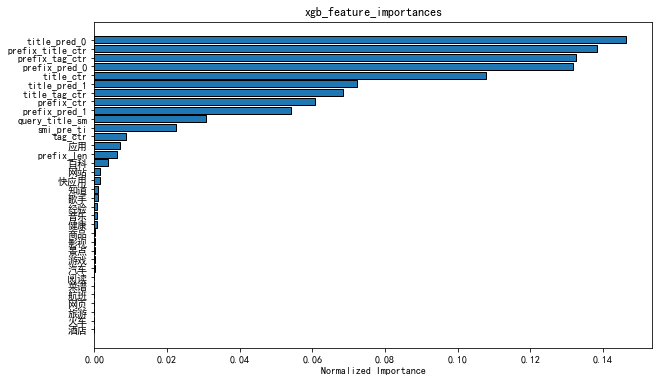

In [30]:
plot_feature_importance(xgb_feature_importances,'xgb_feature_importances')

In [32]:
train['label'].to_csv('E:/competionfile/oppo/data/singleFeature/train_label',index=False)
test['label'].to_csv('E:/competionfile/oppo/data/singleFeature/test_label',index=False)